In [4]:
import kagglehub
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


path = kagglehub.dataset_download("nirmalsankalana/rice-leaf-disease-image")
class_names = os.listdir(path)

100%|██████████| 195M/195M [00:04<00:00, 51.0MB/s]

Extracting files...


In [5]:
images = []
labels = []

for class_name in class_names:
    class_folder = os.path.join(path, class_name)

    for filename in os.listdir(class_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(class_folder, filename)

            img = Image.open(img_path)
            img = img.convert('RGB')
            img = img.resize((128, 128))
            img_array = np.array(img)

            images.append(img_array)
            labels.append(class_name)

images_array = np.array(images)
labels_array = np.array(labels)

print("Images array shape:", images_array.shape)
print("Labels array shape:", labels_array.shape)


Images array shape: (4268, 128, 128, 3)
Labels array shape: (4268,)


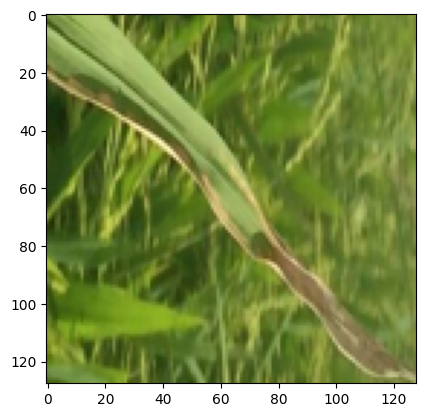

In [6]:
plt.imshow(images_array[0])

In [7]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels_array)

images_array, y_encoded = shuffle(images_array, y_encoded)

X_train, X_test, y_train, y_test = train_test_split(images_array, y_encoded, test_size=0.33, random_state=42)

In [8]:
X_train, X_test = X_train / 255, X_test / 255

In [9]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model

K = len(set(y_train))

i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2, activation = 'relu') (i)
x = MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid") (x)
x = Conv2D(64, (3, 3), strides = 2, activation = 'relu') (x)
x = MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid") (x)
x = Conv2D(128, (3, 3), strides = 2, activation = 'relu') (x)
x = MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid") (x)
x = Flatten() (x)
x = Dropout(0.5) (x)
x = Dense(1024, activation = 'relu') (x)
x = Dropout(0.2) (x)
x = Dense(K, activation = 'softmax') (x)

model = Model(i, x)


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
res = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.4086 - loss: 1.2596 - val_accuracy: 0.6501 - val_loss: 0.8629
Epoch 2/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - accuracy: 0.6403 - loss: 0.8737 - val_accuracy: 0.6466 - val_loss: 0.8276
Epoch 3/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 164ms/step - accuracy: 0.6864 - loss: 0.7729 - val_accuracy: 0.7757 - val_loss: 0.6109
Epoch 4/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 154ms/step - accuracy: 0.7673 - loss: 0.6403 - val_accuracy: 0.7984 - val_loss: 0.5425
Epoch 5/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 146ms/step - accuracy: 0.8092 - loss: 0.5243 - val_accuracy: 0.7161 - val_loss: 0.6989
Epoch 6/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.8089 - loss: 0.4988 - val_accuracy: 0.8616 - val_loss: 0.3759
Epoch 7/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 138ms/step - accuracy: 0.8595 - loss: 0.3790 - val_accuracy: 0.8907 - val_loss: 0.3149
Epoch 8/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.8879 - loss: 0.3080 - val_accu

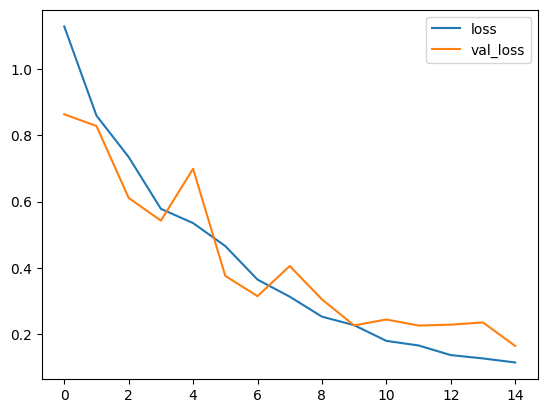

In [11]:
plt.plot(res.history['loss'], label='loss')
plt.plot(res.history['val_loss'], label='val_loss')
plt.legend()

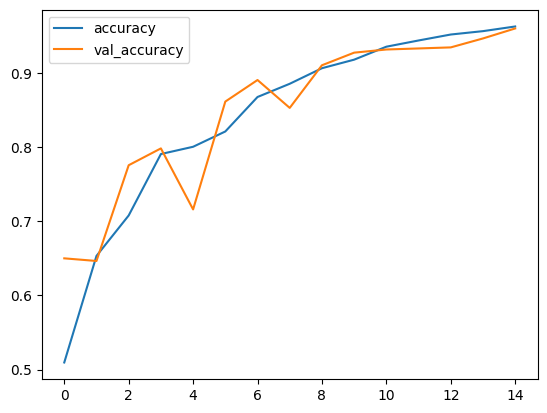

In [12]:
plt.plot(res.history['accuracy'], label='accuracy')
plt.plot(res.history['val_accuracy'], label='val_accuracy')
plt.legend()